##**1. Árbol de Decisión para Clasificación**

Dado que el análisis exploratorio de este set de datos ya se realizó en las actividades anteriores ahora solo se procede directo a la creación entrenamiento y validación del modelo y su correspondiente evaluación.

In [ ]:
# CARGA DE LOS DATOS

import pandas as pd
import numpy as np
from sklearn import datasets

dataset = datasets.load_breast_cancer()
data_frame = pd.DataFrame(np.c_[dataset['data'], dataset['target']],
columns= np.append(dataset['feature_names'], ['target']))
data_frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


###**1.1. Preparación de los Datos**

In [ ]:
# SELECCIÓN DE LAS VARIABLES
X = data_frame.drop(["target"],axis=1)

# DEFINICIÓN DE LA ETIQUETA
y = data_frame.target

###**1.2. Creación del Modelo, Entrenamiento, Validación y Evaluación**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# SEPARAR LOS DATOS EN ENTRENAMIENTO Y PRUEBA PARA EL ALGORITMO

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 29)
modelo = DecisionTreeClassifier(random_state=29)

# ENTRENAMIENTO DEL MODELO
modelo.fit(X_train, y_train)

# VALIDACIÓN DEL MODELO
y_pred = modelo.predict(X_test)

# EVALUACIÓN DEL MODELO
print('Precisión del Modelo:', modelo.score(X_test, y_test))
print('Accuracy del Modelo:', accuracy_score(y_test, y_pred))

Precisión del Modelo: 0.8771929824561403
Accuracy del Modelo: 0.8771929824561403


###**1.3. Representación Gráfica del Árbol de Decisión**

Profundidad del Árbol: 6
Número de Nodos Terminales: 19


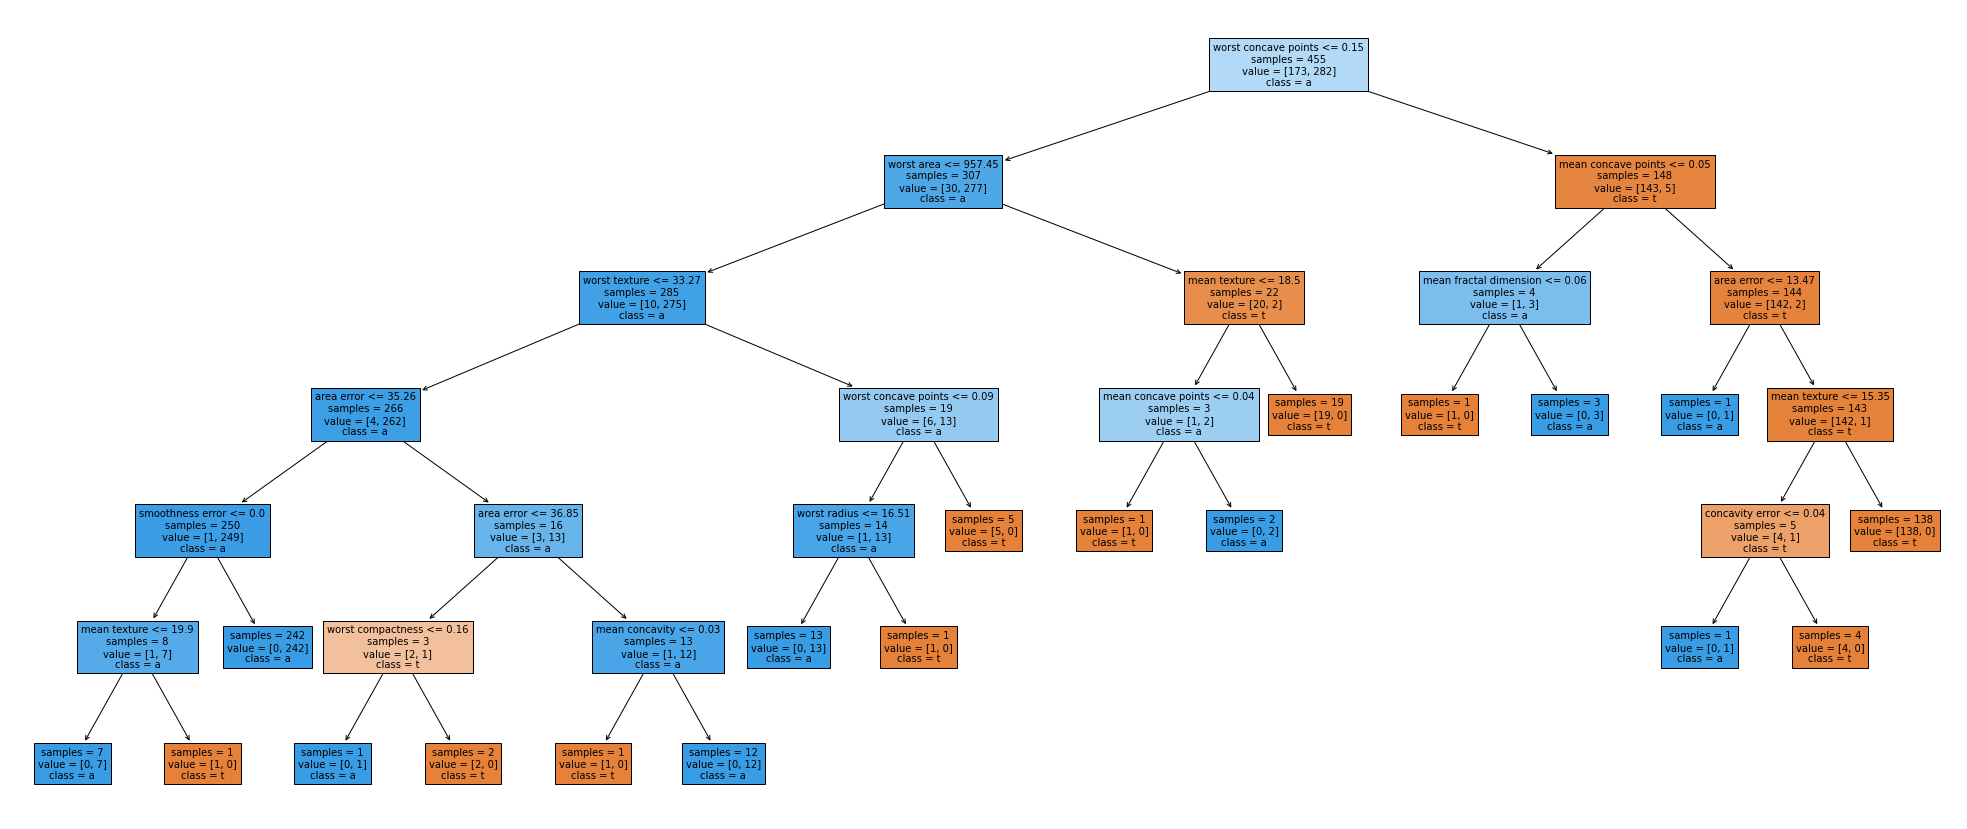

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(35, 15))

print(f"Profundidad del Árbol: {modelo.get_depth()}")
print(f"Número de Nodos Terminales: {modelo.get_n_leaves()}")

plot = plot_tree(decision_tree = modelo,
            feature_names = data_frame.drop(columns = ["target"]).columns,
            class_names = 'target',
            filled = True,
            impurity = False,
            fontsize = 10,
            precision = 2,
            ax = ax)